# Loading model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
eff_1 = EfficientNetB0(include_top=True,weights='imagenet')

21839872/21834768 [==============================] - 0s 0us/step


# Test model (part c)

40960/35363 [==================================] - 0s 0us/step


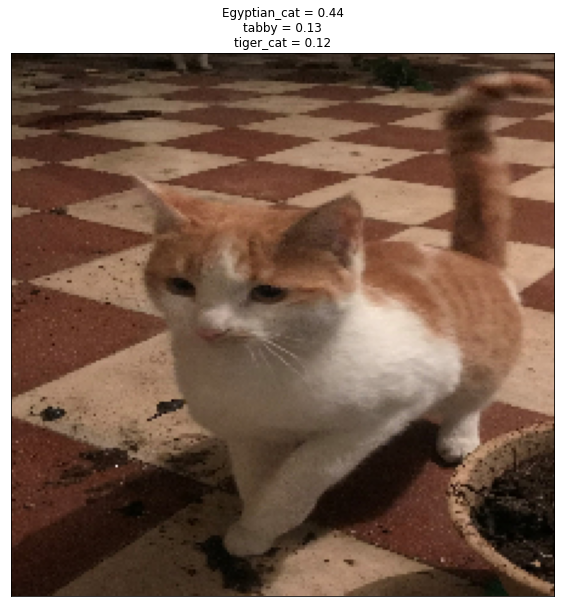

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import decode_predictions
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test1.JPG')
img2 = cv2.resize(img,(224,224))
a = eff_1.predict(img2.reshape(1,224,224,3))
c1,c2,c3 = decode_predictions(a)[0][:3]
b,g,r = cv2.split(img2)
img2 = cv2.merge((r,g,b))
plt.figure(figsize=(10,10))
plt.imshow(img2)
s1 = c1[1]+' = '+str(np.round(c1[2],2))
s2 = c2[1]+' = '+str(np.round(c2[2],2))
s3 = c3[1]+' = '+str(np.round(c3[2],2))
plt.title(s1+'\n'+s2+'\n'+s3)
plt.xticks([])
plt.yticks([])
plt.savefig('Output.jpg',dpi=200,quality=95,bbox_inches="tight")

#  Unknown class input

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
# loading data
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()
# normalizing data
x_train = np.float32(X_train)
x_test = np.float32(X_test)
# one-hot label
y_train = keras.utils.to_categorical(Y_train,10)
y_test = keras.utils.to_categorical(Y_test,10)
a = tf.image.resize(x_test,[224,224])

170500096/170498071 [==============================] - 4s 0us/step


# Train model (part d)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow.keras as keras
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.models import Model
eff_3 = EfficientNetB0(include_top=False,weights='imagenet')
eff_3.trainable = False
eff_net = eff_3.output
x = GlobalAveragePooling2D()(eff_net)
x = Dropout(0.4)(x)
x = Dense(10,activation='softmax')(x)
model = Model(eff_3.input,x)
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(a,y_test,epochs=10,
          validation_split=.3,batch_size=32)

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/10
219/219 [==============================] - 22s 102ms/step - loss: 1.0409 - accuracy: 0.6686 - val_loss: 0.6102 - val_accuracy: 0.8000
Epoch 2/10
219/219 [==============================] - 20s 91ms/step - loss: 0.6352 - accuracy: 0.7894 - val_loss: 0.5123 - val_accuracy: 0.8293
Epoch 3/10
219/219 [==============================] - 20s 90ms/step - loss: 0.5579 - accuracy: 0.8106 - val_loss: 0.4703 - val_accuracy: 0.8370
Epoch 4/10
219/219 [==============================] - 20s 90ms/step - loss: 0.5141 - accuracy: 0.8294 - val_loss: 0.4488 - val_accuracy: 0.8463
Epoch 5/10
219/219 [==============================] - 20s 90ms/step - loss: 0.4876 - accuracy: 0.8359 - val_loss: 0.4363 - val_accuracy: 0.8457
Epoch 6/10
219/219 [==============================] - 20s 90ms/step - loss: 0.4646 - accuracy: 0.8453 - val_loss: 0.4279 - val_accuracy: 0.8470
Epoch 7/10
219/219 [==============================] - 20s 90ms/step - 

# Show result (part d)

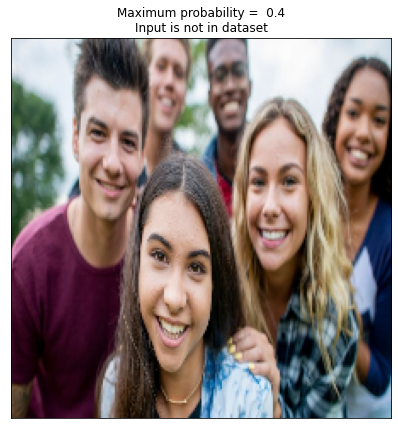

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test4.jpg')
img2 = cv2.resize(img,(224,224))
pred = np.max(model.predict(img2.reshape(1,224,224,3)))
b,g,r = cv2.split(img2)
img2 = cv2.merge((r,g,b))
s1 = 'Maximum probability =  '+str(np.round(pred,2))
if pred>.6:
  s2 = 'Input is in dataset'
else:
  s2= 'Input is not in dataset'
plt.figure(figsize=(7,7))
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title(s1+'\n'+s2)
plt.savefig('unknown_class.jpg',dpi=300,qulity=95,bbox_inches='tight')

# Loading data set

In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('cats_vs_dogs', split='train',
               as_supervised=True,shuffle_files=True)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteU6OP1N/cats_vs_dogs-train.tfrecord


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


# Creating dataset

In [ ]:
import numpy as np
import cv2
import tensorflow.keras.utils as utils
y = np.ones((3000,))
x = np.ones((3000,224,224,3))
data = ds.take(3000)
for i,(img, label) in enumerate(tfds.as_numpy(data)):
  y[i] = label
  x[i] = cv2.resize(img,(224,224))
  
m0 = np.where(y==0)
m0 = np.array(m0)
m1 = np.where(y==1)
m1 = np.array(m1)
ind1 = np.concatenate((m0[0,:1000],m1[0,:1000]),axis=0)
x_train = x[ind1]
y1 = y[ind1]
ind2 = np.concatenate((m0[0,1000:1300],m1[0,1000:1300]),axis=0)
x_test = x[ind2]
y2 = y[ind2]
y_train = utils.to_categorical(y1,2)
y_test = utils.to_categorical(y2,2)

# Showing some imaged

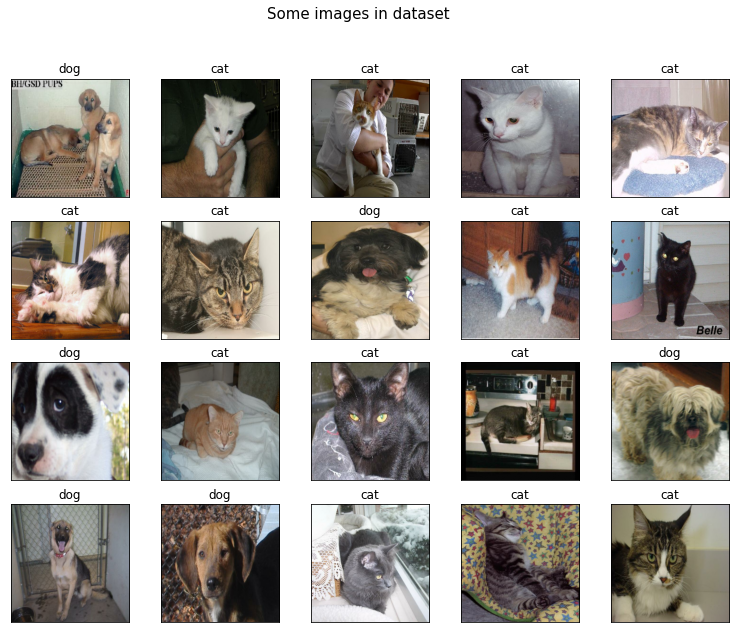

In [ ]:
import matplotlib.pyplot as plt
L = ['cat','dog']
s = np.random.choice(np.arange(2000),20,replace=False)
plt.figure(figsize=(13,10))
plt.suptitle('Some images in dataset',fontsize=15)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[s[i]]/255)
  plt.xticks([])
  plt.yticks([])
  lab = L[int(y1[s[i]])]
  plt.title(lab)

plt.savefig('dataset_example.jpg',dpi=300,qulity=95,bbox_inches='tight')

# Train model (part e)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow.keras as keras
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.models import Model
eff_3 = EfficientNetB0(include_top=False,weights='imagenet')
eff_3.trainable = False
eff_net = eff_3.output
x = GlobalAveragePooling2D()(eff_net)
x = Dropout(0.4)(x)
x = Dense(2,activation='softmax')(x)
model = Model(eff_3.input,x)
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,
          validation_split=.3,batch_size=16)

16711680/16705208 [==============================] - 0s 0us/step
Epoch 1/10
88/88 [==============================] - 5s 60ms/step - loss: 0.1578 - accuracy: 0.9393 - val_loss: 0.1348 - val_accuracy: 0.9733
Epoch 2/10
88/88 [==============================] - 4s 45ms/step - loss: 0.0541 - accuracy: 0.9864 - val_loss: 0.0881 - val_accuracy: 0.9833
Epoch 3/10
88/88 [==============================] - 4s 46ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0689 - val_accuracy: 0.9867
Epoch 4/10
88/88 [==============================] - 4s 46ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.0799 - val_accuracy: 0.9817
Epoch 5/10
88/88 [==============================] - 4s 46ms/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0642 - val_accuracy: 0.9867
Epoch 6/10
88/88 [==============================] - 4s 45ms/step - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.0795 - val_accuracy: 0.9783
Epoch 7/10
88/88 [==============================] - 4s 45ms/step - loss: 0.0217 - accurac

# Evaluate model

19/19 [==============================] - 1s 67ms/step - loss: 0.0323 - accuracy: 0.9917


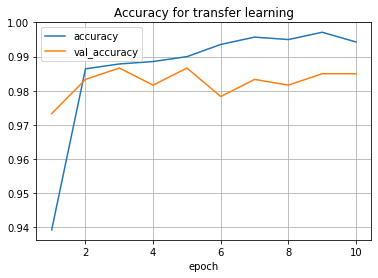

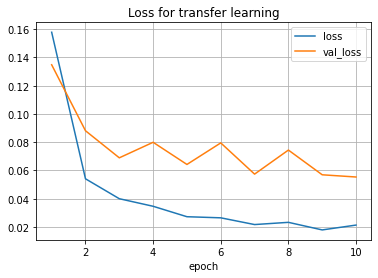

In [ ]:
import matplotlib.pyplot as plt
model.evaluate(x_test,y_test)
ep = 10;
plt.plot(np.arange(1,ep+1),history.history['accuracy'],label='accuracy')
plt.plot(np.arange(1,ep+1),history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy for transfer learning')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('acc_tl.jpg',dpi=300,quality=95,bbox_inches='tight')
plt.figure()
plt.plot(np.arange(1,ep+1),history.history['loss'],label='loss')
plt.plot(np.arange(1,ep+1),history.history['val_loss'],label='val_loss')
plt.title('Loss for transfer learning')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.savefig('loss_tl.jpg',dpi=300,quality=95,bbox_inches='tight')

# Confusion matrix

19/19 [==============================] - 1s 70ms/step - loss: 0.0377 - accuracy: 0.9917


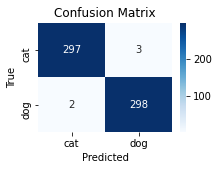

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
model.evaluate(x_test,y_test)
L = ['cat','dog']
y_pred = np.argmax(model.predict(x_test),axis=1)
y_target = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_target, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(cm,cmap='Blues',annot=True,fmt="d",
           xticklabels=L,yticklabels=L)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('cm.jpg',dpi=300,qulity=95,bbox_inches='tight')

# Imagenet claases

In [ ]:
import numpy as np
import pandas as pd
from keras.applications.imagenet_utils import decode_predictions
a = np.ones((1,1000))/1000
L = decode_predictions(a,top=1000)
label = []
for i in range(1000):
  label.append(L[0][i][1])

df = pd.DataFrame(label,columns=['Class'])
df.to_csv('imagenet.csv')
df

,Class
0,toilet_tissue
1,sea_urchin
2,hog
3,zebra
4,sorrel
...,...
995,Model_T
996,mobile_home
997,mixing_bowl
998,mitten
